In [28]:
import pandas as pd 
from IPython.display import display, Markdown
import matplotlib.pyplot as plt  
from scipy.stats import kurtosis
from tabulate import tabulate

df = pd.read_csv("../data/data_train.csv")
#Merubah tipe data yang terdiri dari 1 dan 0 menjadi tipe data boolean

kolom_boolean = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for kolom in kolom_boolean:
    df[kolom] = df[kolom].astype(bool)
# Fungsi untuk statistika dasar
def statistikaDasar(kolom, df):
    return df[kolom].describe()

# Fungsi untuk mencari duplicate value
def duplicateValue(kolom, df):
    duplicate_counts = df[kolom].duplicated(keep=False)
    duplicate_values = df[kolom][duplicate_counts]
    counts = duplicate_values.value_counts()
    if not counts.empty:
        return counts
    else:
        return "Tidak ada data yang merupakan duplikat."

# Fungsi untuk mencari missing value
def missingValue(kolom, df):
    missing_indices = df.index[df[kolom].isna()].tolist()
    missing_count = len(missing_indices)
    return missing_indices, missing_count

# Fungsi untuk mencari outlier
def findOutlier(kolom, df):
    if df[kolom].dtype == 'int64' or df[kolom].dtype == 'float64':
        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
        if outliers.empty:
            return "Tidak ada outlier"
        else:
            return outliers
    else:
        return "Tidak ada outlier"
# Fungsi untuk menggambar grafik
def drawGraphic(kolom, df):
    if df[kolom].dtype == 'int64' or df[kolom].dtype == 'float64':
        # Kolom numerik
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        df[kolom].plot(kind='hist', bins=10)
        plt.title(f'Distribusi Data - {kolom}')
        kurt = kurtosis(df[kolom])
        print("Nilai Kurtosis")
        print(kurt)
    else:
        # Kolom non numerik
        plt.figure(figsize=(6, 4))
        df[kolom].value_counts().plot(kind='bar')
        plt.title(f'Histogram - {kolom}') 
    plt.show()
# Fungsi untuk mencari kolerasi
def calculationWithColumnTarget(kolom, df):
    correlation = df[kolom].corr(df['price_range'])
    return correlation
#Fungsi Untuk Mengeluarkan semua hasil 
def finalValue(kolom, df):
    result = statistikaDasar(kolom, df)
    table = tabulate(result.to_frame(), headers=["Statistik Dasar"], tablefmt="pipe")
    display(Markdown(f"**Statistika Dasar {kolom}**"))
    display(Markdown(table))
    display(Markdown(f"**Duplicate Value {kolom} Data Train**"))
    result1 = duplicateValue(kolom, df)
    table1 = tabulate(result1.to_frame(), headers=["Duplicate Value"], tablefmt="pipe")
    display(Markdown(table1))
    display(Markdown(f"**Missing Value {kolom} Data Train**"))
    missing_value, missing_count = missingValue(kolom, df)
    if(missing_count == 0):
        display("Tidak ada missing value")
    else:
        print("Jumlah mising value adalah", end=" ")
        print(missing_count)
        result2 = missing_value
        table2 = tabulate(result2.to_frame(), headers=["Missing Value"], tablefmt="pipe")
        display(Markdown(f"**Missing value {kolom}**"))
        display(Markdown(table2))
    display(Markdown(f"**Outlier {kolom} Data Train**"))
    result3 = findOutlier(kolom, df)
    if isinstance(result3, pd.Series):
        table3 = tabulate(result3.to_frame(), headers=["Outlier"], tablefmt="pipe")
        display(Markdown(f"**Outlier {kolom}**"))
        display(Markdown(table3))
    else:
        display(Markdown("Tidak ada outlier"))
    display(Markdown("**Distribusi data**"))
    drawGraphic(kolom, df)
    display(Markdown("**Kolerasi dengan kolom 'price_range'**"))
    print(calculationWithColumnTarget(kolom, df))

**Statistika Dasar px_height**

|       |   Statistik Dasar |
|:------|------------------:|
| count |          1400     |
| mean  |           643.178 |
| std   |           444.629 |
| min   |             0     |
| 25%   |           273.75  |
| 50%   |           561     |
| 75%   |           950.25  |
| max   |          1960     |

**Duplicate Value px_height Data Train**

|      |   Duplicate Value |
|-----:|------------------:|
|  347 |                 5 |
|   88 |                 5 |
|  526 |                 5 |
|  730 |                 4 |
|  140 |                 4 |
|  217 |                 4 |
|  447 |                 4 |
|  831 |                 4 |
|  632 |                 4 |
|  322 |                 4 |
|  416 |                 4 |
|  273 |                 4 |
|  919 |                 4 |
|  275 |                 4 |
|  229 |                 4 |
|  410 |                 4 |
|  179 |                 4 |
|  293 |                 4 |
| 1111 |                 3 |
|  168 |                 3 |
|  300 |                 3 |
|  211 |                 3 |
|  327 |                 3 |
|   96 |                 3 |
|  622 |                 3 |
|  207 |                 3 |
|  356 |                 3 |
|  329 |                 3 |
|  690 |                 3 |
|  268 |                 3 |
|  881 |                 3 |
|  935 |                 3 |
|  713 |                 3 |
|  154 |                 3 |
|  371 |                 3 |
|  629 |                 3 |
|  150 |                 3 |
|  320 |                 3 |
|  547 |                 3 |
|   90 |                 3 |
|  119 |                 3 |
|  253 |                 3 |
|   59 |                 3 |
|  398 |                 3 |
|  186 |                 3 |
| 1055 |                 3 |
|  335 |                 3 |
|  358 |                 3 |
|  798 |                 3 |
|   58 |                 3 |
|  271 |                 3 |
|  204 |                 3 |
|  262 |                 3 |
|  518 |                 3 |
|  431 |                 3 |
|  651 |                 3 |
|  419 |                 3 |
|  584 |                 3 |
|  380 |                 3 |
|  395 |                 3 |
|  332 |                 3 |
|  344 |                 3 |
| 1109 |                 3 |
|  214 |                 3 |
|  291 |                 3 |
|  163 |                 3 |
|  961 |                 3 |
| 1064 |                 3 |
|  311 |                 3 |
|  655 |                 3 |
|  533 |                 3 |
|  381 |                 3 |
|  777 |                 3 |
|   56 |                 3 |
| 1028 |                 3 |
|   79 |                 3 |
|  781 |                 3 |
|  674 |                 3 |
|  404 |                 3 |
|  667 |                 3 |
|  199 |                 3 |
|  159 |                 3 |
|  670 |                 3 |
|   46 |                 3 |
|  942 |                 3 |
|  333 |                 3 |
|  286 |                 3 |
|  236 |                 3 |
|  564 |                 3 |
|  160 |                 3 |
|  251 |                 3 |
|  306 |                 3 |
| 1331 |                 3 |
| 1314 |                 3 |
|   85 |                 3 |
|   83 |                 3 |
|  125 |                 2 |
|  743 |                 2 |
|  189 |                 2 |
| 1571 |                 2 |
|  793 |                 2 |
|  161 |                 2 |
|  148 |                 2 |
|  838 |                 2 |
|  511 |                 2 |
|  212 |                 2 |
|  818 |                 2 |
|   64 |                 2 |
|   42 |                 2 |
|  225 |                 2 |
|   81 |                 2 |
| 1399 |                 2 |
|  581 |                 2 |
|  227 |                 2 |
|  190 |                 2 |
|  346 |                 2 |
|  308 |                 2 |
|  117 |                 2 |
|  839 |                 2 |
|  717 |                 2 |
|  649 |                 2 |
|  683 |                 2 |
|  205 |                 2 |
|   86 |                 2 |
|  382 |                 2 |
|  553 |                 2 |
|  570 |                 2 |
|  859 |                 2 |
|  379 |                 2 |
| 1054 |                 2 |
| 1092 |                 2 |
|  409 |                 2 |
|  905 |                 2 |
| 1222 |                 2 |
|   68 |                 2 |
|  747 |                 2 |
|  519 |                 2 |
|  527 |                 2 |
|  206 |                 2 |
|  471 |                 2 |
| 1179 |                 2 |
| 1172 |                 2 |
|  741 |                 2 |
|  681 |                 2 |
|  386 |                 2 |
|  223 |                 2 |
|  181 |                 2 |
|  954 |                 2 |
|  754 |                 2 |
|  338 |                 2 |
|  757 |                 2 |
|  202 |                 2 |
|  299 |                 2 |
|  599 |                 2 |
|  433 |                 2 |
|  233 |                 2 |
| 1482 |                 2 |
|  473 |                 2 |
|  759 |                 2 |
|  297 |                 2 |
|  167 |                 2 |
|   39 |                 2 |
|  385 |                 2 |
|  258 |                 2 |
|  647 |                 2 |
|  776 |                 2 |
|   71 |                 2 |
|  442 |                 2 |
|  532 |                 2 |
|  561 |                 2 |
|  364 |                 2 |
|  331 |                 2 |
| 1168 |                 2 |
|  504 |                 2 |
|  912 |                 2 |
|  837 |                 2 |
|  758 |                 2 |
|  484 |                 2 |
|  417 |                 2 |
|  323 |                 2 |
|   19 |                 2 |
|  466 |                 2 |
|  963 |                 2 |
|  574 |                 2 |
| 1091 |                 2 |
| 1194 |                 2 |
| 1325 |                 2 |
| 1208 |                 2 |
|  127 |                 2 |
|  403 |                 2 |
| 1563 |                 2 |
| 1187 |                 2 |
|  902 |                 2 |
| 1012 |                 2 |
|  118 |                 2 |
|   35 |                 2 |
|  478 |                 2 |
|   52 |                 2 |
|  176 |                 2 |
| 1100 |                 2 |
|  543 |                 2 |
|  499 |                 2 |
|  295 |                 2 |
|  436 |                 2 |
|  361 |                 2 |
|  480 |                 2 |
| 1171 |                 2 |
| 1052 |                 2 |
|  313 |                 2 |
|  126 |                 2 |
|  290 |                 2 |
|  492 |                 2 |
|  699 |                 2 |
|  209 |                 2 |
|  767 |                 2 |
| 1107 |                 2 |
| 1177 |                 2 |
|  192 |                 2 |
|  762 |                 2 |
|  169 |                 2 |
| 1191 |                 2 |
|   48 |                 2 |
| 1086 |                 2 |
|  522 |                 2 |
|  366 |                 2 |
|  861 |                 2 |
|  284 |                 2 |
|  885 |                 2 |
|  937 |                 2 |
| 1013 |                 2 |
|  142 |                 2 |
|  590 |                 2 |
|  591 |                 2 |
|  336 |                 2 |
|  115 |                 2 |
| 1003 |                 2 |
|  724 |                 2 |
| 1134 |                 2 |
|  191 |                 2 |
|  938 |                 2 |
|  600 |                 2 |
|  951 |                 2 |
|  785 |                 2 |
|  114 |                 2 |
|  531 |                 2 |
|  287 |                 2 |
|  706 |                 2 |
|  948 |                 2 |
|   43 |                 2 |
|  788 |                 2 |
|  725 |                 2 |
|  867 |                 2 |
| 1058 |                 2 |
|  897 |                 2 |
|  468 |                 2 |
|  773 |                 2 |
|  263 |                 2 |
| 1362 |                 2 |
|  267 |                 2 |
|  111 |                 2 |
|  607 |                 2 |
|  173 |                 2 |
|  461 |                 2 |
| 1226 |                 2 |
| 1419 |                 2 |
|  412 |                 2 |
|  765 |                 2 |
| 1230 |                 2 |
|  405 |                 2 |
|  982 |                 2 |
|  105 |                 2 |
|  491 |                 2 |
|  486 |                 2 |
|  430 |                 2 |
|  281 |                 2 |
|  782 |                 2 |
| 1209 |                 2 |
| 1233 |                 2 |
| 1392 |                 2 |
|  983 |                 2 |
|  231 |                 2 |
|  494 |                 2 |
|  742 |                 2 |
|  174 |                 2 |
|  485 |                 2 |
|  560 |                 2 |
| 1116 |                 2 |
|  920 |                 2 |
|  193 |                 2 |
|  606 |                 2 |
|  626 |                 2 |
|   77 |                 2 |
|  623 |                 2 |
|  249 |                 2 |
|  165 |                 2 |
|  312 |                 2 |
|  157 |                 2 |
|  103 |                 2 |
|  875 |                 2 |
|  314 |                 2 |
|  901 |                 2 |
| 1698 |                 2 |
|  710 |                 2 |
|  819 |                 2 |
| 1081 |                 2 |
|  854 |                 2 |
|   91 |                 2 |
|  238 |                 2 |
|  120 |                 2 |
|  512 |                 2 |
| 1001 |                 2 |
|  925 |                 2 |
|  541 |                 2 |
| 1125 |                 2 |
|    8 |                 2 |
|  129 |                 2 |
|  712 |                 2 |
| 1175 |                 2 |
|  276 |                 2 |
|  985 |                 2 |
| 1025 |                 2 |
|  774 |                 2 |
| 1495 |                 2 |
|  614 |                 2 |
|  650 |                 2 |
|  177 |                 2 |
|  394 |                 2 |
|  187 |                 2 |
|  146 |                 2 |
|  274 |                 2 |
|  235 |                 2 |
|  605 |                 2 |
|  800 |                 2 |
|  501 |                 2 |
|  449 |                 2 |
|  833 |                 2 |
|  138 |                 2 |
|  178 |                 2 |
| 1024 |                 2 |
|   98 |                 2 |
|   65 |                 2 |
|  550 |                 2 |
|  687 |                 2 |
| 1010 |                 2 |
|  454 |                 2 |
|   55 |                 2 |
|  707 |                 2 |
|  134 |                 2 |

**Missing Value px_height Data Train**

'Tidak ada missing value'

**Outlier px_height Data Train**

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-0.31938304471706


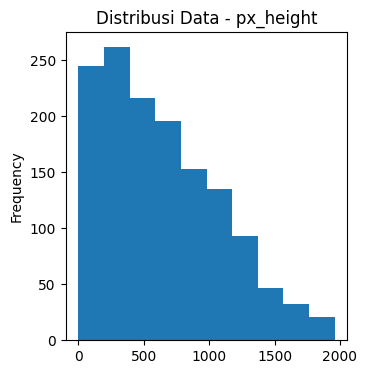

**Kolerasi dengan kolom 'price_range'**

0.15883273548307963


In [29]:
#Nomor 12 Kolom px_height
finalValue('px_height',df)
#Hasil Analisis

**Statistika Dasar px_width**

|       |   Statistik Dasar |
|:------|------------------:|
| count |          1400     |
| mean  |          1251.72  |
| std   |           428.983 |
| min   |           500     |
| 25%   |           876.5   |
| 50%   |          1247     |
| 75%   |          1627.5   |
| max   |          1998     |

**Duplicate Value px_width Data Train**

|      |   Duplicate Value |
|-----:|------------------:|
| 1247 |                 6 |
| 1463 |                 5 |
| 1234 |                 5 |
| 1923 |                 5 |
|  882 |                 4 |
| 1759 |                 4 |
| 1670 |                 4 |
| 1011 |                 4 |
| 1564 |                 4 |
|  891 |                 4 |
| 1767 |                 4 |
|  831 |                 4 |
| 1079 |                 4 |
| 1353 |                 4 |
| 1418 |                 4 |
| 1393 |                 4 |
| 1299 |                 4 |
| 1026 |                 4 |
| 1203 |                 4 |
| 1226 |                 4 |
| 1469 |                 4 |
|  822 |                 4 |
|  874 |                 4 |
| 1666 |                 4 |
| 1383 |                 4 |
|  642 |                 3 |
|  816 |                 3 |
| 1988 |                 3 |
|  817 |                 3 |
| 1435 |                 3 |
| 1726 |                 3 |
| 1055 |                 3 |
| 1849 |                 3 |
| 1596 |                 3 |
| 1118 |                 3 |
| 1304 |                 3 |
| 1545 |                 3 |
| 1182 |                 3 |
| 1264 |                 3 |
| 1162 |                 3 |
|  823 |                 3 |
| 1910 |                 3 |
| 1933 |                 3 |
| 1262 |                 3 |
|  583 |                 3 |
|  510 |                 3 |
|  676 |                 3 |
| 1152 |                 3 |
|  915 |                 3 |
| 1330 |                 3 |
| 1504 |                 3 |
| 1786 |                 3 |
| 1046 |                 3 |
| 1208 |                 3 |
| 1713 |                 3 |
| 1018 |                 3 |
|  736 |                 3 |
| 1813 |                 3 |
|  559 |                 3 |
| 1554 |                 3 |
| 1814 |                 3 |
|  989 |                 3 |
|  963 |                 3 |
| 1717 |                 3 |
| 1595 |                 3 |
| 1724 |                 3 |
| 1089 |                 3 |
| 1029 |                 3 |
|  804 |                 3 |
| 1224 |                 3 |
| 1663 |                 3 |
| 1742 |                 3 |
| 1931 |                 3 |
|  563 |                 3 |
| 1212 |                 3 |
| 1873 |                 3 |
| 1477 |                 3 |
|  679 |                 3 |
|  818 |                 3 |
|  970 |                 3 |
| 1836 |                 3 |
|  627 |                 3 |
| 1178 |                 3 |
| 1441 |                 3 |
| 1744 |                 3 |
| 1179 |                 3 |
| 1317 |                 3 |
| 1345 |                 3 |
| 1411 |                 3 |
|  881 |                 3 |
| 1429 |                 3 |
|  952 |                 3 |
|  682 |                 3 |
| 1854 |                 3 |
| 1009 |                 3 |
|  654 |                 3 |
|  522 |                 3 |
|  519 |                 3 |
| 1723 |                 2 |
| 1897 |                 2 |
| 1967 |                 2 |
| 1704 |                 2 |
| 1578 |                 2 |
| 1929 |                 2 |
| 1235 |                 2 |
| 1294 |                 2 |
|  932 |                 2 |
| 1963 |                 2 |
|  603 |                 2 |
| 1377 |                 2 |
|  956 |                 2 |
| 1076 |                 2 |
|  727 |                 2 |
| 1805 |                 2 |
| 1876 |                 2 |
| 1629 |                 2 |
|  670 |                 2 |
| 1004 |                 2 |
|  527 |                 2 |
| 1073 |                 2 |
| 1316 |                 2 |
| 1641 |                 2 |
|  564 |                 2 |
| 1532 |                 2 |
| 1974 |                 2 |
|  616 |                 2 |
|  663 |                 2 |
| 1292 |                 2 |
| 1947 |                 2 |
|  728 |                 2 |
| 1019 |                 2 |
| 1796 |                 2 |
| 1727 |                 2 |
|  836 |                 2 |
|  899 |                 2 |
| 1398 |                 2 |
|  759 |                 2 |
| 1143 |                 2 |
| 1905 |                 2 |
|  557 |                 2 |
| 1968 |                 2 |
|  884 |                 2 |
|  599 |                 2 |
| 1656 |                 2 |
|  747 |                 2 |
|  967 |                 2 |
| 1702 |                 2 |
| 1206 |                 2 |
| 1491 |                 2 |
| 1291 |                 2 |
| 1127 |                 2 |
|  710 |                 2 |
| 1728 |                 2 |
| 1643 |                 2 |
|  675 |                 2 |
| 1155 |                 2 |
| 1658 |                 2 |
| 1623 |                 2 |
| 1040 |                 2 |
| 1309 |                 2 |
| 1331 |                 2 |
|  999 |                 2 |
| 1311 |                 2 |
| 1777 |                 2 |
|  539 |                 2 |
| 1517 |                 2 |
| 1205 |                 2 |
| 1382 |                 2 |
| 1613 |                 2 |
| 1648 |                 2 |
| 1758 |                 2 |
| 1032 |                 2 |
|  507 |                 2 |
| 1165 |                 2 |
| 1989 |                 2 |
| 1673 |                 2 |
|  938 |                 2 |
|  681 |                 2 |
| 1781 |                 2 |
|  873 |                 2 |
| 1078 |                 2 |
| 1958 |                 2 |
| 1677 |                 2 |
|  819 |                 2 |
|  893 |                 2 |
| 1497 |                 2 |
|  969 |                 2 |
| 1416 |                 2 |
| 1084 |                 2 |
| 1951 |                 2 |
| 1942 |                 2 |
| 1005 |                 2 |
| 1437 |                 2 |
|  623 |                 2 |
| 1917 |                 2 |
| 1975 |                 2 |
| 1832 |                 2 |
|  877 |                 2 |
|  990 |                 2 |
|  513 |                 2 |
|  590 |                 2 |
|  800 |                 2 |
| 1539 |                 2 |
|  683 |                 2 |
| 1471 |                 2 |
| 1090 |                 2 |
| 1062 |                 2 |
| 1190 |                 2 |
| 1551 |                 2 |
| 1985 |                 2 |
|  775 |                 2 |
| 1604 |                 2 |
| 1769 |                 2 |
| 1352 |                 2 |
| 1163 |                 2 |
| 1238 |                 2 |
|  530 |                 2 |
| 1492 |                 2 |
| 1698 |                 2 |
|  687 |                 2 |
| 1445 |                 2 |
| 1259 |                 2 |
|  550 |                 2 |
| 1448 |                 2 |
| 1229 |                 2 |
|  740 |                 2 |
|  644 |                 2 |
| 1256 |                 2 |
|  709 |                 2 |
| 1882 |                 2 |
|  832 |                 2 |
|  751 |                 2 |
| 1916 |                 2 |
| 1809 |                 2 |
| 1442 |                 2 |
|  855 |                 2 |
|  870 |                 2 |
| 1983 |                 2 |
|  724 |                 2 |
|  794 |                 2 |
| 1838 |                 2 |
| 1827 |                 2 |
|  565 |                 2 |
| 1579 |                 2 |
| 1739 |                 2 |
| 1499 |                 2 |
|  774 |                 2 |
| 1482 |                 2 |
|  974 |                 2 |
|  997 |                 2 |
|  684 |                 2 |
|  922 |                 2 |
| 1452 |                 2 |
| 1803 |                 2 |
| 1039 |                 2 |
| 1456 |                 2 |
| 1811 |                 2 |
|  643 |                 2 |
| 1389 |                 2 |
| 1638 |                 2 |
| 1219 |                 2 |
| 1651 |                 2 |
| 1167 |                 2 |
| 1682 |                 2 |
| 1615 |                 2 |
| 1293 |                 2 |
| 1308 |                 2 |
|  898 |                 2 |
|  613 |                 2 |
| 1007 |                 2 |
| 1195 |                 2 |
| 1413 |                 2 |
| 1263 |                 2 |
|  742 |                 2 |
| 1099 |                 2 |
|  697 |                 2 |
| 1191 |                 2 |
|  614 |                 2 |
|  721 |                 2 |
|  714 |                 2 |
| 1088 |                 2 |
| 1686 |                 2 |
|  660 |                 2 |
| 1506 |                 2 |
| 1484 |                 2 |
|  793 |                 2 |
| 1970 |                 2 |
| 1434 |                 2 |
| 1500 |                 2 |
| 1553 |                 2 |
| 1249 |                 2 |
| 1433 |                 2 |
| 1948 |                 2 |
| 1334 |                 2 |
|  821 |                 2 |
| 1376 |                 2 |
| 1652 |                 2 |
| 1654 |                 2 |
| 1520 |                 2 |
| 1350 |                 2 |
|  705 |                 2 |
|  730 |                 2 |
| 1123 |                 2 |
|  986 |                 2 |
| 1924 |                 2 |
| 1177 |                 2 |
| 1850 |                 2 |
| 1261 |                 2 |
| 1025 |                 2 |
| 1583 |                 2 |
| 1633 |                 2 |
| 1793 |                 2 |
| 1131 |                 2 |
| 1248 |                 2 |
| 1244 |                 2 |
| 1791 |                 2 |
| 1606 |                 2 |
| 1364 |                 2 |
| 1465 |                 2 |
| 1746 |                 2 |
|  516 |                 2 |
|  807 |                 2 |
| 1782 |                 2 |
| 1688 |                 2 |
| 1529 |                 2 |
| 1710 |                 2 |
| 1552 |                 2 |
| 1543 |                 2 |
| 1738 |                 2 |
| 1199 |                 2 |
| 1151 |                 2 |
|  849 |                 2 |
| 1284 |                 2 |
| 1617 |                 2 |
|  939 |                 2 |
| 1420 |                 2 |
|  741 |                 2 |
| 1858 |                 2 |
|  517 |                 2 |
| 1591 |                 2 |
|  512 |                 2 |
|  501 |                 2 |
| 1230 |                 2 |
|  860 |                 2 |
|  621 |                 2 |
|  745 |                 2 |
| 1614 |                 2 |
| 1976 |                 2 |
| 1159 |                 2 |
| 1020 |                 2 |
| 1385 |                 2 |
|  790 |                 2 |
| 1175 |                 2 |
|  655 |                 2 |
|  734 |                 2 |
| 1409 |                 2 |
|  912 |                 2 |
| 1472 |                 2 |
| 1919 |                 2 |
|  806 |                 2 |
| 1747 |                 2 |
| 1473 |                 2 |
|  906 |                 2 |
|  764 |                 2 |

**Missing Value px_width Data Train**

'Tidak ada missing value'

**Outlier px_width Data Train**

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.1761112837507963


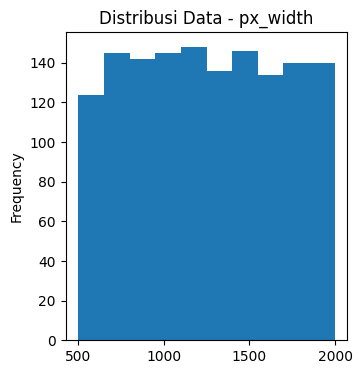

**Kolerasi dengan kolom 'price_range'**

0.1787126901102656


In [30]:
#Nomor 13 Kolom px_width
finalValue('px_width',df)
#Hasil Analisis

**Statistika Dasar ram**

|       |   Statistik Dasar |
|:------|------------------:|
| count |           1400    |
| mean  |           2106.73 |
| std   |           1078.35 |
| min   |            256    |
| 25%   |           1201    |
| 50%   |           2102    |
| 75%   |           3035.75 |
| max   |           3998    |

**Duplicate Value ram Data Train**

|      |   Duplicate Value |
|-----:|------------------:|
| 1229 |                 4 |
| 3142 |                 4 |
|  595 |                 3 |
| 2190 |                 3 |
| 2107 |                 3 |
| 2678 |                 3 |
| 3865 |                 3 |
| 1303 |                 3 |
| 1974 |                 3 |
| 3488 |                 3 |
| 1457 |                 3 |
| 2973 |                 3 |
| 1869 |                 3 |
|  606 |                 3 |
| 2598 |                 3 |
|  315 |                 3 |
| 3206 |                 3 |
| 1037 |                 3 |
| 1998 |                 3 |
| 2563 |                 3 |
| 1300 |                 3 |
| 3117 |                 3 |
| 2488 |                 3 |
| 1713 |                 3 |
| 2700 |                 3 |
| 3210 |                 3 |
| 1663 |                 2 |
|  398 |                 2 |
| 1482 |                 2 |
| 2885 |                 2 |
| 3038 |                 2 |
| 1069 |                 2 |
|  696 |                 2 |
| 3256 |                 2 |
| 3796 |                 2 |
|  690 |                 2 |
| 3927 |                 2 |
| 2020 |                 2 |
| 1543 |                 2 |
| 2457 |                 2 |
|  820 |                 2 |
|  545 |                 2 |
| 1464 |                 2 |
| 3755 |                 2 |
| 1944 |                 2 |
|  751 |                 2 |
| 2651 |                 2 |
|  869 |                 2 |
| 3799 |                 2 |
| 1201 |                 2 |
| 2940 |                 2 |
| 1214 |                 2 |
| 1687 |                 2 |
| 2419 |                 2 |
| 1853 |                 2 |
| 1947 |                 2 |
| 1704 |                 2 |
| 1973 |                 2 |
| 3242 |                 2 |
| 3104 |                 2 |
| 1816 |                 2 |
| 3685 |                 2 |
| 2385 |                 2 |
| 3358 |                 2 |
| 1799 |                 2 |
| 3836 |                 2 |
|  643 |                 2 |
| 3701 |                 2 |
| 2050 |                 2 |
|  905 |                 2 |
|  854 |                 2 |
|  582 |                 2 |
|  575 |                 2 |
| 2454 |                 2 |
| 2268 |                 2 |
|  728 |                 2 |
|  604 |                 2 |
| 1675 |                 2 |
| 2003 |                 2 |
| 2855 |                 2 |
| 2614 |                 2 |
| 2727 |                 2 |
|  714 |                 2 |
| 1308 |                 2 |
| 3278 |                 2 |
| 3902 |                 2 |
| 3872 |                 2 |
| 2192 |                 2 |
|  392 |                 2 |
| 2338 |                 2 |
| 2736 |                 2 |
| 1052 |                 2 |
| 1724 |                 2 |
| 1324 |                 2 |
| 1906 |                 2 |
| 2052 |                 2 |
| 2775 |                 2 |
|  590 |                 2 |
| 1882 |                 2 |
|  278 |                 2 |
| 1655 |                 2 |
| 3771 |                 2 |
| 3703 |                 2 |
| 2674 |                 2 |
| 2016 |                 2 |
| 3587 |                 2 |
|  619 |                 2 |
| 3764 |                 2 |
| 2376 |                 2 |
|  707 |                 2 |
| 1354 |                 2 |
| 2039 |                 2 |
| 3941 |                 2 |
| 2248 |                 2 |
| 3271 |                 2 |
| 2908 |                 2 |
| 1591 |                 2 |
|  941 |                 2 |
|  770 |                 2 |
| 3914 |                 2 |
| 3204 |                 2 |
| 1424 |                 2 |
| 3366 |                 2 |
| 1326 |                 2 |
| 2981 |                 2 |
| 3132 |                 2 |
| 2337 |                 2 |
| 2977 |                 2 |
| 3518 |                 2 |
| 1851 |                 2 |
|  841 |                 2 |
| 3397 |                 2 |
|  663 |                 2 |
|  587 |                 2 |
|  629 |                 2 |
| 3707 |                 2 |
|  461 |                 2 |
| 1733 |                 2 |
| 1519 |                 2 |
| 2870 |                 2 |
| 3646 |                 2 |
| 1181 |                 2 |
| 3078 |                 2 |
| 2782 |                 2 |
| 2438 |                 2 |
| 1637 |                 2 |
| 2343 |                 2 |
|  819 |                 2 |
| 3472 |                 2 |
| 2819 |                 2 |
| 1414 |                 2 |
| 1155 |                 2 |
| 3139 |                 2 |
| 3451 |                 2 |
| 3153 |                 2 |
| 1234 |                 2 |
| 2227 |                 2 |
| 2378 |                 2 |
| 2844 |                 2 |
| 2965 |                 2 |
| 1571 |                 2 |
| 3917 |                 2 |
| 2156 |                 2 |
|  624 |                 2 |
| 3458 |                 2 |
|  462 |                 2 |
| 2466 |                 2 |
| 2711 |                 2 |
| 1653 |                 2 |
| 1017 |                 2 |
| 2096 |                 2 |
|  980 |                 2 |
| 3654 |                 2 |
|  348 |                 2 |
| 2495 |                 2 |
| 2073 |                 2 |
| 2610 |                 2 |
| 2219 |                 2 |
| 3566 |                 2 |
| 2456 |                 2 |
|  666 |                 2 |
|  725 |                 2 |
| 1152 |                 2 |
| 2437 |                 2 |
| 1641 |                 2 |
| 3684 |                 2 |
| 1440 |                 2 |
| 3355 |                 2 |
| 2278 |                 2 |
| 3169 |                 2 |
| 2948 |                 2 |
|  417 |                 2 |
|  990 |                 2 |
| 2253 |                 2 |
| 2944 |                 2 |
| 3534 |                 2 |
| 2066 |                 2 |
| 3845 |                 2 |
| 3317 |                 2 |
|  323 |                 2 |
| 1693 |                 2 |
| 2528 |                 2 |

**Missing Value ram Data Train**

'Tidak ada missing value'

**Outlier ram Data Train**

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.18619191592568


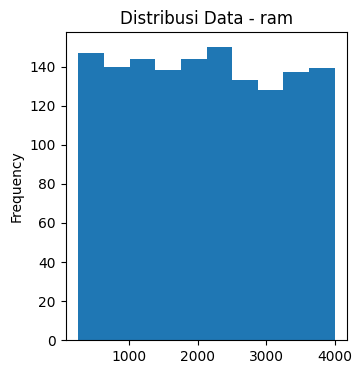

**Kolerasi dengan kolom 'price_range'**

0.9183192307843839


In [31]:
#Nomor 14 Kolom ram
finalValue('ram',df)
#Hasil Analisis

**Statistika Dasar sc_h**

|       |   Statistik Dasar |
|:------|------------------:|
| count |         1400      |
| mean  |           12.2857 |
| std   |            4.2042 |
| min   |            5      |
| 25%   |            9      |
| 50%   |           12      |
| 75%   |           16      |
| max   |           19      |

**Duplicate Value sc_h Data Train**

|    |   Duplicate Value |
|---:|------------------:|
| 17 |               134 |
|  7 |               108 |
| 12 |               107 |
| 14 |               100 |
| 15 |               100 |
| 16 |                99 |
| 13 |                95 |
| 10 |                94 |
| 11 |                88 |
| 19 |                84 |
| 18 |                82 |
|  6 |                81 |
|  9 |                80 |
|  8 |                79 |
|  5 |                69 |

**Missing Value sc_h Data Train**

'Tidak ada missing value'

**Outlier sc_h Data Train**

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.1833343207794749


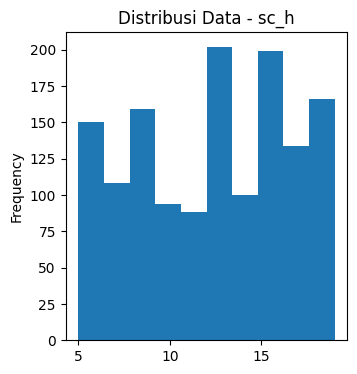

**Kolerasi dengan kolom 'price_range'**

0.012148883173074988


In [32]:
#Nomor 15 kolom sc_h
finalValue('sc_h',df)

**Statistika Dasar sc_w**

|       |   Statistik Dasar |
|:------|------------------:|
| count |        1400       |
| mean  |           5.665   |
| std   |           4.37223 |
| min   |           0       |
| 25%   |           2       |
| 50%   |           5       |
| 75%   |           9       |
| max   |          18       |

**Duplicate Value sc_w Data Train**

|    |   Duplicate Value |
|---:|------------------:|
|  1 |               151 |
|  3 |               144 |
|  0 |               137 |
|  4 |               136 |
|  5 |               108 |
|  2 |               104 |
|  7 |                96 |
|  8 |                88 |
|  6 |                81 |
| 10 |                73 |
|  9 |                67 |
| 11 |                50 |
| 12 |                45 |
| 13 |                38 |
| 16 |                23 |
| 15 |                21 |
| 14 |                19 |
| 17 |                14 |
| 18 |                 5 |

**Missing Value sc_w Data Train**

'Tidak ada missing value'

**Outlier sc_w Data Train**

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-0.33772957471254195


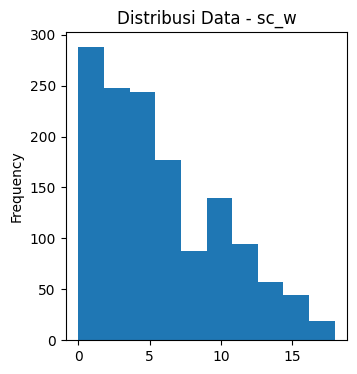

**Kolerasi dengan kolom 'price_range'**

0.019911698810365006


In [33]:
#Nomor 16 kolom sc_w
finalValue('sc_w',df)

**Statistika Dasar talk_time**

|       |   Statistik Dasar |
|:------|------------------:|
| count |        1400       |
| mean  |          11.0421  |
| std   |           5.39905 |
| min   |           2       |
| 25%   |           6       |
| 50%   |          11       |
| 75%   |          16       |
| max   |          20       |

**Duplicate Value talk_time Data Train**

|    |   Duplicate Value |
|---:|------------------:|
| 15 |                86 |
| 16 |                82 |
|  4 |                81 |
|  7 |                81 |
| 19 |                80 |
|  8 |                79 |
|  9 |                78 |
| 12 |                78 |
| 18 |                77 |
| 14 |                77 |
|  6 |                77 |
| 11 |                73 |
|  2 |                69 |
| 10 |                68 |
| 13 |                65 |
|  5 |                63 |
|  3 |                63 |
| 20 |                63 |
| 17 |                60 |

**Missing Value talk_time Data Train**

'Tidak ada missing value'

**Outlier talk_time Data Train**

Tidak ada outlier

**Distribusi data**

Nilai Kurtosis
-1.192047843180249


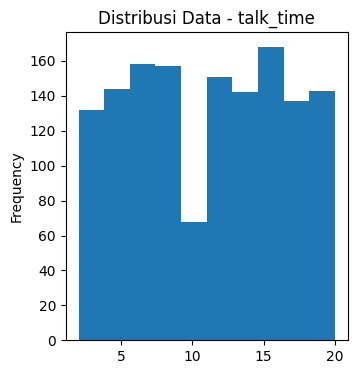

**Kolerasi dengan kolom 'price_range'**

0.011112731754754877


In [34]:
#Nomor 17 kolom talk_time
finalValue('talk_time',df)

In [8]:
#Nomor 18 kolom three_g 
finalValue('three_g',df)

In [9]:
#Nomor 19 kolom touch_screen
finalValue('touch_screen',df)

In [10]:
#Nomor 20 kolom wifi
finalValue('wifi',df)

In [11]:
#Nomor 21 kolom price_range
finalValue('price_range',df)